# 2018-04-24 - Génerer des sets de MotionClouds statiques
On va génerer des ensembles de 500 MotionClouds statiques pour différentes valeurs de B$\theta$ et $\theta$, dans le but de faire apprendre à un réseau convolutionné la détection de l'orientation $\theta$. Plus B$\theta$ est grand, moins la détection de l'orientation devrait être facile :

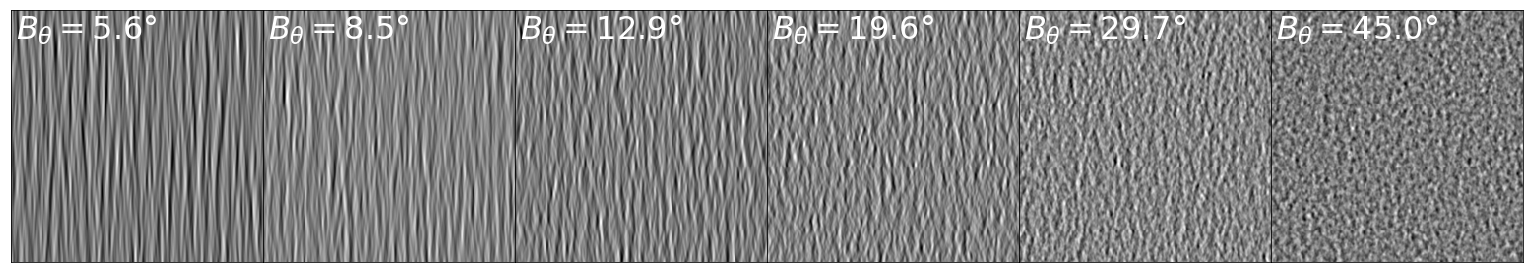

In [2]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)


N_theta = 6
bw_values = np.pi*np.logspace(-5, -2, N_theta, base=2)
fig_width = 21


fig, axs = plt.subplots(1, N_theta, figsize=(fig_width, fig_width/N_theta))
for i_ax, B_theta in enumerate(bw_values):
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=np.pi/2, B_theta=B_theta)
    im = mc.random_cloud(mc_i)
                
    axs[i_ax].imshow(im[:, :, 0], cmap=plt.gray())
    axs[i_ax].text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='white', fontsize=32)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
plt.tight_layout()
fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)

On commence par génerer un ensemble de 500 clouds pour B$\theta$ appartenant à [1°:15°] pour $\theta$ = 0, $\theta$ = $\pi$/4, $\theta$ = $\pi$/2, $\theta$ = 3$\pi$/4.
Pour chaque $\theta$, on va créer un folder spécifique ou seront sauvegardés les 500 clouds.
![Err : Impossible d'afficher le cercle trigonométrique](http://etc.usf.edu/clipart/43200/43215/unit-circle7_43215_sm.gif)
On crée aussi un folder de 25 clouds qui serviront à tester le réseau.

In [ ]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio

downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_theta = 500
N_theta_test = 25

bw_values = np.pi*np.logspace(-7,-3.5, N_theta, base=2)
bw_test_values = np.pi*np.logspace(-7,-3.5, N_theta_test, base=2)
fig_width = 21
print('Btheta list : \n'+str( bw_values*180/np.pi))

theta_list = [0,np.pi/2, np.pi/4, 3*np.pi/4] #liste des angles theta

for t in theta_list :
    if not os.path.exists('./clouds_easy/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_easy/%s' % t)
    
    for i_ax, B_theta in enumerate(bw_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_easy/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()       

for t in theta_list :
    if not os.path.exists('./clouds_easy/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_easy/%s' % t)
    if not os.path.exists('./clouds_easy_test/%s' % t):
        os.makedirs('./clouds_easy_test/%s' % t)

    for i_ax, B_theta in enumerate(bw_test_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_easy_test/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()

Pour des valeurs de B$\theta$ entre 15° et 30° (un peu plus dur) :

In [ ]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio

downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_theta = 500
N_theta_test = 25

bw_values = np.pi*np.logspace(-3.5, -2.5, N_theta, base=2)
bw_test_values = np.pi*np.logspace(-3.5,-2.5, N_theta_test, base=2)

fig_width = 21
print('Btheta list : \n'+str( bw_values*180/np.pi))

theta_list = [0,np.pi/2, np.pi/4, 3*np.pi/4] #liste des angles theta
for t in theta_list :
    if not os.path.exists('./clouds_medium/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_medium/%s' % t)

    for i_ax, B_theta in enumerate(bw_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_medium/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()
        
for t in theta_list :
    if not os.path.exists('./clouds_medium_test/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_medium_test/%s' % t)

    for i_ax, B_theta in enumerate(bw__test_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_medium_test/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()

Et enfin pour des valeurs de B$\theta$ entre 30° et 45° (difficile) :

In [ ]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio

downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_theta = 500
N_theta_test = 25

bw_values = np.pi*np.logspace(-2.5,-2, N_theta, base=2)
bw_test_values = np.pi*np.logspace(-2.5,-2, N_theta_test, base=2)

fig_width = 21
print('Btheta list : \n'+str( bw_values*180/np.pi))

theta_list = [0,np.pi/2, np.pi/4, 3*np.pi/4] #liste des angles theta

for t in theta_list :
    if not os.path.exists('./clouds_hard/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_hard/%s' % t)

    for i_ax, B_theta in enumerate(bw_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_hard/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()

for t in theta_list :
    if not os.path.exists('./clouds_hard_test/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_hard_test/%s' % t)

    for i_ax, B_theta in enumerate(bw_test_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_hard_test/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()